In [1]:
"""
Preamble for most code and jupyter notebooks
@author: tobinsouth
@notebook date: 12 Nov 2021
"""

import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import math, string, re, pickle, json, os, sys, datetime, itertools
from collections import Counter
from tqdm import tqdm

# Set panda's options
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 120)

# Better graphics
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('seaborn-poster')

In [ ]:
from pyannote.audio.pipelines import VoiceActivityDetection
pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation")
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.1, "offset": 0.1,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.1,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.1
}
pipeline.instantiate(HYPER_PARAMETERS)
vad = pipeline("/u/tsouth/projects/educationText/data/audiofiles/7184_5497_2021-05-06_My_AudioRecord[9].wav")
# `vad` is a pyannote.core.Annotation instance containing speech regions

In [1]:
from pyannote.audio import Inference
inference = Inference("pyannote/segmentation")
segmentation = inference("/u/tsouth/projects/educationText/data/audiofiles/7184_5497_2021-05-06_My_AudioRecord[9].wav")

/u/tsouth/python/lib/python3.8/site-packages/torchaudio/backend/utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


In [35]:
from pyannote.audio.pipelines import OverlappedSpeechDetection
pipeline = OverlappedSpeechDetection(segmentation="pyannote/segmentation")
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.01, "offset": 0.1,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}
pipeline.instantiate(HYPER_PARAMETERS)
osd = pipeline("/u/tsouth/projects/educationText/data/audiofiles/414_5703__3_tutoria1Sec.wav")

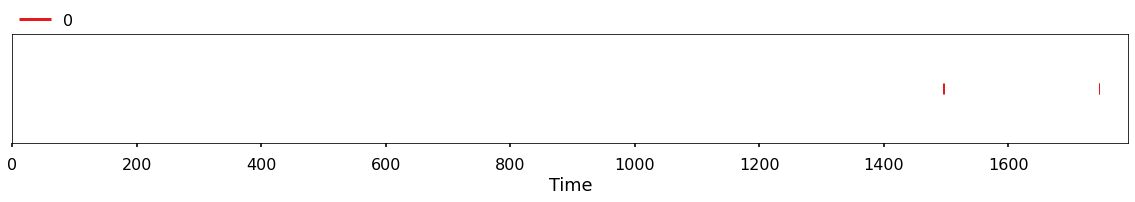

In [36]:
osd

In [39]:
from pyannote.audio.pipelines import SpeakerDiarization

In [1]:
import numpy as np
from pydiar.models import BinaryKeyDiarizationModel, Segment
from pydiar.util.misc import optimize_segments
from pydub import AudioSegment

INPUT_FILE = "/u/tsouth/projects/educationText/data/audiofiles/7184_5497_2021-05-06_My_AudioRecord[9].wav"

diarization_model = BinaryKeyDiarizationModel()


audio = AudioSegment.from_wav(INPUT_FILE).set_frame_rate(32000).set_channels(1)
segments = diarization_model.diarize(32000, np.array(audio.get_array_of_samples()))
optimized_segments = optimize_segments(segments)

In [19]:
audio_segments = []
for seg in optimized_segments:
    chops = int(np.ceil(seg.length / 119))
    for i in range(chops):
        length = seg.length if chops == 1 else (119 if i < chops else seg.length - (chops - 1) * 119)
        audio_segments.append({'start': seg.start + i*119, 'len': length, 'end': seg.start + length + i*119, 'speaker_id': int(seg.speaker_id)})    

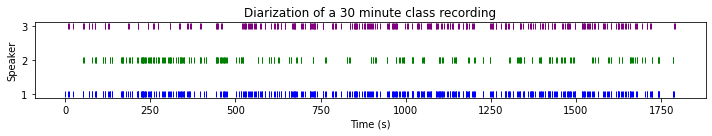

In [12]:
import matplotlib.pyplot as plt, matplotlib
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Diarization of a 30 minute class recording')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Speaker')

cmap = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'black', 5: 'orange', 8: 'pink', 9: 'gray'}
for segment in optimized_segments:
    y = segment.speaker_id
    plt.plot(segment.start, y, segment.start+segment.length, y, marker = '|', color=cmap[y])

ax.set_yticks([1,2,3])
plt.tight_layout()
plt.savefig('../figs/diarization.png', dpi = 500)